In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import matplotlib

# Dataset
data_path = '../data/bayesian_training/'
data_filename = 'training_minnett_err-boatspd-x2_humid10.csv'

data_interval1 = [96,413]
data_interval2 = [1290,1585]

In [2]:
data_orig1 = pd.read_csv(data_path+data_filename)[data_interval1[0]:data_interval1[1]]
data_orig2 = pd.read_csv(data_path+data_filename)[data_interval2[0]:data_interval2[1]]

In [3]:
data_orig1

,times,sst,sst_err,ftemp,wind,atemp,swrad,humid,boatspd
96,103693.92,292.689,0.162740,292.839,6.084,291.927,0.6,0.01,11.8
97,104397.60,292.779,0.106849,292.929,6.946,291.927,0.7,0.01,11.4
98,105092.40,292.784,0.165726,292.924,6.890,291.942,0.6,0.01,11.7
99,105787.44,292.690,0.167616,292.861,7.170,291.981,0.5,0.01,12.0
100,106482.24,292.705,0.152466,292.807,6.809,292.012,0.5,0.01,11.9
...,...,...,...,...,...,...,...,...,...
408,331953.12,294.594,0.096877,294.738,3.358,294.660,0.5,0.01,12.6
409,332651.76,294.527,0.209260,294.679,4.214,294.665,0.5,0.01,12.2
410,333350.40,294.973,0.177534,295.042,5.591,294.916,0.5,0.01,12.4
411,334049.52,295.267,0.216904,295.279,6.126,295.163,0.5,0.01,12.7


<ErrorbarContainer object of 3 artists>

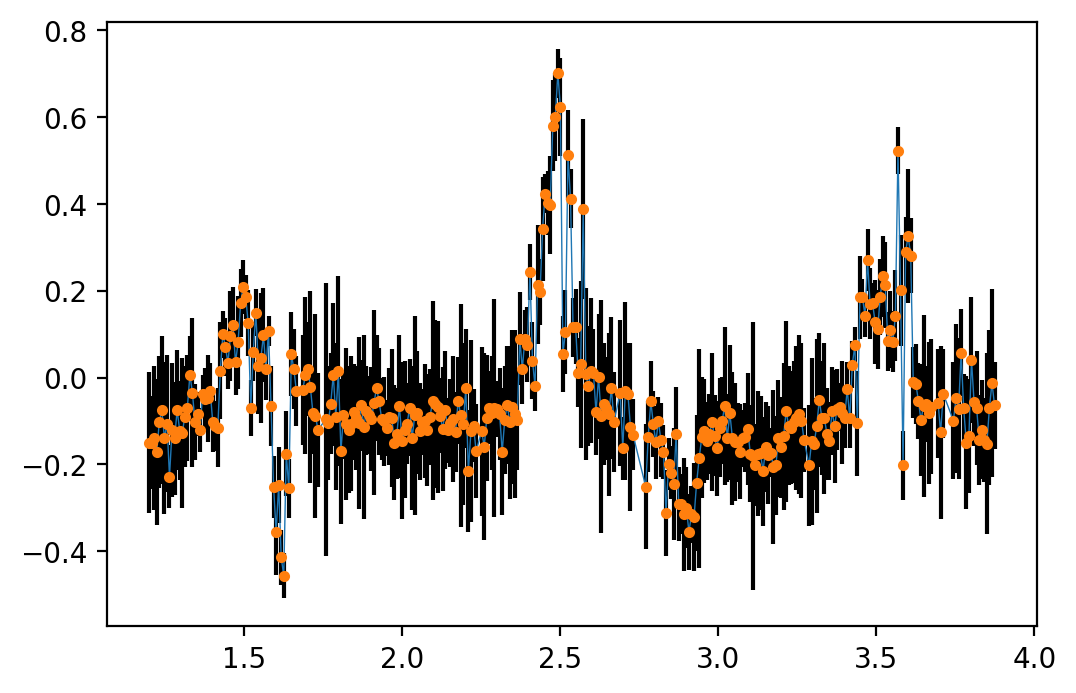

In [4]:
times1 = data_orig1['times'].to_numpy(np.float64)/86400
dsst1 = (data_orig1['sst']-data_orig1['ftemp']).to_numpy(np.float64)
ssterr1 = data_orig1['sst_err'].to_numpy(np.float64)

fig, ax = plt.subplots(dpi=200)
ax.plot(times1,dsst1,lw=.5)
ax.errorbar(times1,dsst1,yerr=ssterr1,fmt='.',ecolor='k')

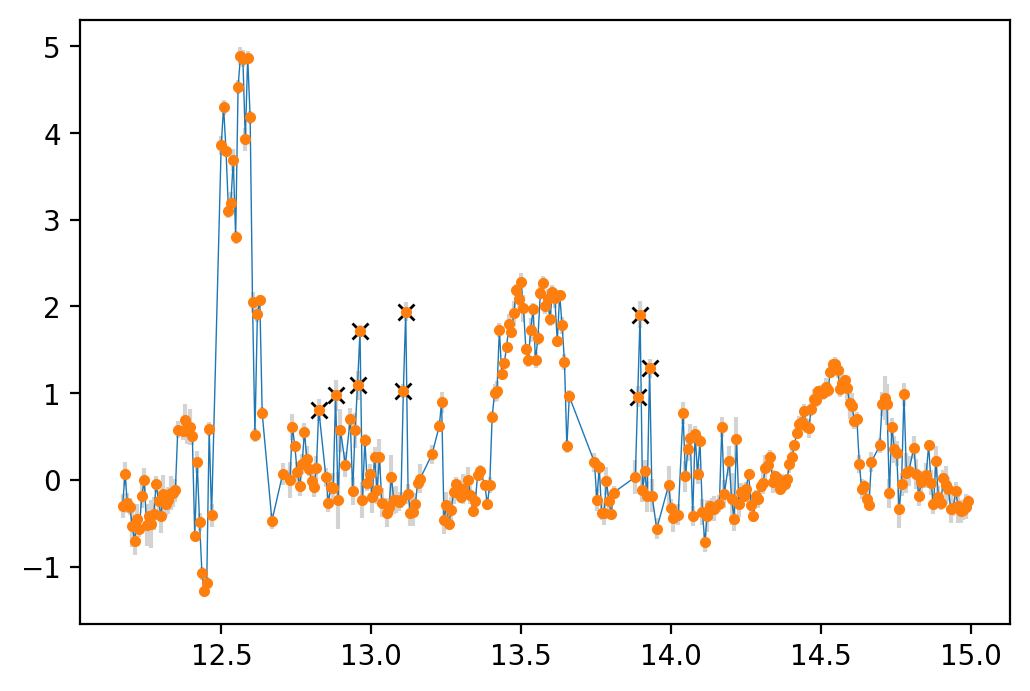

In [5]:
times2 = data_orig2['times'].to_numpy(np.float64)/86400
dsst2 = (data_orig2['sst']-data_orig2['ftemp']).to_numpy(np.float64)
ssterr2 = data_orig2['sst_err'].to_numpy(np.float64)

fig, ax = plt.subplots(dpi=200)
ax.plot(times2,dsst2,lw=.5)
ax.errorbar(times2,dsst2,yerr=ssterr2,fmt='.',ecolor='lightgray')

removeidx = [69,74,81,82,99,100,171,172,176]
ax.plot(times2[removeidx],dsst2[removeidx],'x',c='k')

In [6]:

data_clean2 = data_orig2.drop(data_orig2.index[removeidx])

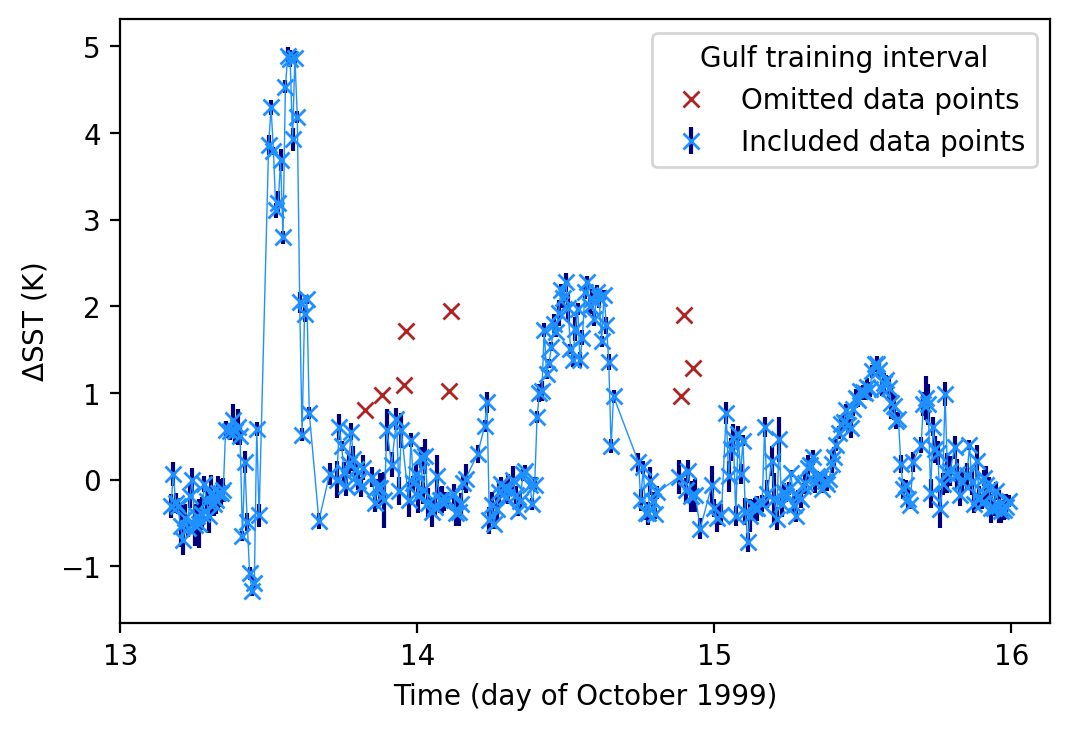

In [24]:
times_clean2 = data_clean2['times'].to_numpy(np.float64)/86400
dsst_clean2 = (data_clean2['sst']-data_clean2['ftemp']).to_numpy(np.float64)
ssterr_clean2 = data_clean2['sst_err'].to_numpy(np.float64)

fig, ax = plt.subplots(dpi=200)
ax.plot(times_clean2,dsst_clean2,lw=.5,c='dodgerblue')
ax.errorbar(times_clean2,dsst_clean2,yerr=ssterr_clean2,fmt='x',ecolor='navy',c='dodgerblue',label='Included data points')

removeidx = [69,74,81,82,99,100,171,172,176]
ax.plot(times2[removeidx],dsst2[removeidx],'x',c='firebrick',label='Omitted data points')
ax.legend(title='Gulf training interval')
ax.set(xlabel='Time (day of October 1999)',ylabel='$\Delta$SST (K)',xticks=[12,13,14,15],xticklabels=[13,14,15,16])

#plt.savefig('../../Masterarbeit/thesis/figs/omitted-datapoints.pdf')